<img src='./img/img.jpg' vspace='8px' hspace='8px'/>
<h1><center>Análise dos Jogadores do FIFA 19</center></h1>
<h2>Introdução</h2>

FIFA é uma franquia de futebol publicada pela EA Sports, onde todo ano vende milhões de cópias para os usuários de diversas plataformas. Anualmente é lançado um novo jogo da sua franquia que leva o seu nome e o ano da próxima temporada, com isso há várias atualizações dos atributos dos jogadores e o time que representam caso tenha alguma transferência.
FIFA é um dos grandes jogos e lançamentos de todo o ano, principalmente na categoria de jogos onde há uma grande quantidade de jogadores ativos e campeonatos de e-sports profissionais e amadores que contam com públicos imensos.

<h2>Dataset</h2>

Esse dataset foi disponibilizado pelo usuário Karan Gadiya no site <a href='https://www.kaggle.com/karangadiya/fifa19'>Kaggle </a>, onde no campo <i>Description</i> ele informa como foi feito o scrapping do banco de dados do FIFA 19.

<h2>Índice</h2>
<ol>
    <li><a href="#LIMPEZA">Limpeza de Dados</a></li>
    <li><a href="#ANALISE">Análise dos Dados</a></li>
    <li><a href="#CONCLUSAO">Conclusão</a></li>
</ol>

<a name="LIMPEZA"></a>
<h2>Limpeza de Dados</h2>

O dataset contém todas os dados dos jogadores disponibilizados pelo jogo, por tanto haverá diversas informações que não serão tão relevantes para a análise também poderá haver alguns dados faltantes. Por isso a necessidade de realizar a limpeza para que facilite a análise futuramente.

<h3>Importando as bibliotecas</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as Axes
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
players = pd.read_csv('data.csv')

Para melhor compreendimento do dataset vamos verificar as 5 primeiras linhas para ver como os dados estão dispostos.

In [3]:
players.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Como visto nas primeiras linhas do dataset há 89 colunas, nem todas serão úteis para fazermos as análises. Veja abaixo todos os nomes das colunas do <i>csv</i> que importamos:

In [4]:
players.columns.values

array(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'S

Conhecendo as colunas foi definido que as colunas abaixo não auxiliaria na análise, por tanto foram inclusas em uma lista para serem retidaras.

In [5]:
drop_col = ['Unnamed: 0','ID','Photo','Flag','Club Logo','Special','International Reputation',
            'Work Rate','Body Type','Real Face','Jersey Number','Joined','Loaned From','Contract Valid Until',
            'Release Clause']

In [6]:
players.drop(drop_col, axis=1, inplace=True) # Removendo as colunas desnecessárias.

Pronto, as colunas que poderiam atrapalhar a análise já foram removidas. Próximo passo seria retirar alguns jogadores que estavam com dados inconsistentes, por exemplo jogadores que não tinha algum dos atributos, como velocidade ou agilidade, e nenhuma posição definida.

In [7]:
players.dropna(subset=['Balance'], axis=0, inplace= True) # Removendo os jogadores que não tinham atributo definido.
players.dropna(subset=['Position'], axis=0, inplace=True) # Removendo os jogadores que não tinha, posição definida.

<a name="ANALISE"></a>
<h2>Análise dos Dados</h2>

Feito a limpeza dos dados agora é possível prosseguir com a análise, e assim queremos ter algumas respostas para as seguintes perguntas:<br>
<ul>
<li><a href="#IDADE">Qual a distribuição de idades dos jogadores?</a></li>
<li><a href="#POTENC">Com qual idade o jogador atinge seu potencial?</a></li>
<li><a href="#MELJOG">Quais os melhores jogadores?</a></li>
<li><a href="#MELJOGPOS">Quais os melhores jogadores por posição?</a></li>
<li><a href="#MELATR">Quais os melhores atributos para cada posição?</a></li>
<li><a href="#TIMES">Quais os times com melhor elenco</a></li>
</ul>

<a name="IDADE"></a>
<h3>Qual a distribuição de idades dos jogadores?</h3>

Verificando o gráfico abaixo pode-se observar que a idade a maioria da idade dos jogadores fica entre 20 a 26 anos.

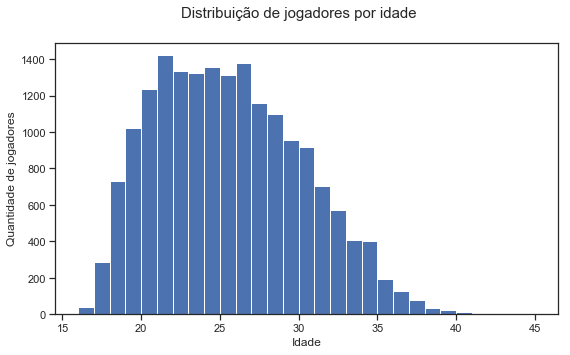

In [8]:
sns.set(style='ticks', palette='deep')
plt.figure(figsize=(9,5))
plt.hist(x=players['Age'], bins=29)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Quantidade de jogadores', fontsize=12)
plt.suptitle('Distribuição de jogadores por idade', fontsize=15)
plt.show()

<a name="POTENC"></a>
<h3>Com qual idade o jogador atinge seu potencial?</h3>

No gráfico demonstra a média dos atributos <i>Overall</i> e <i>Potencial</i> para a mesma idade, e com a idade de 28 anos podemos ver que a média do <i>Potencial</i> se iguala ao <i>Overall</i>, ou seja, com 28 anos o jogador atinge o seu potencial máximo.

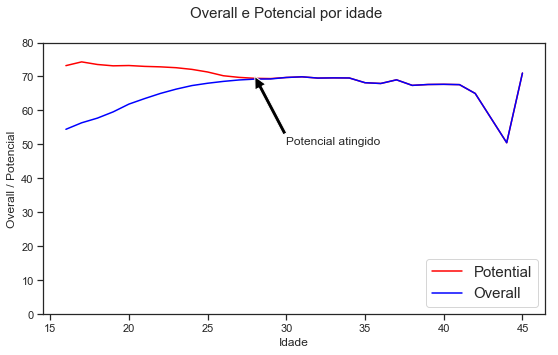

In [9]:
plt.figure(figsize=(9,5))
players.groupby(players['Age']).mean()['Potential'].plot(color='red')
players.groupby(players['Age']).mean()['Overall'].plot(color='blue')
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Overall / Potencial', fontsize=12)
plt.ylim(0,80)
plt.xticks(rotation='horizontal')
plt.suptitle('Overall e Potencial por idade', fontsize=15)
plt.annotate('Potencial atingido',
             xy=(28,70),
             xytext=(30,50),
             arrowprops=dict(facecolor='black',connectionstyle="arc3"))
plt.legend(('Potential','Overall'), loc='lower right', fontsize=15)
plt.show()

<a name="MELJOG"></a>
<h3>Quais os melhores jogadores?</h3>

Levando em consideração o campo <i>Overall</i> como um parâmetro para comparação entre todos os jogadores, desta forma é possível ordenar apenas os jogadores que possuem o <i>Overall</i> acima de 90, ficando com apenas 9 jogadores.

In [10]:
top_players = players.sort_values(['Overall'], ascending=False).head(9)
top_players.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Weak Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,4.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,4.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,3.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,5.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


No gráfico abaixo mostra os 9 jogadores o valor do seu repectivo atributo que foi considerado.<br>
<b>Obs.:</b> foi alterarado os limites do eixo X para que seja possível observar as diferenças entre cada jogador, pois a diferença entre eles é muito pequena.

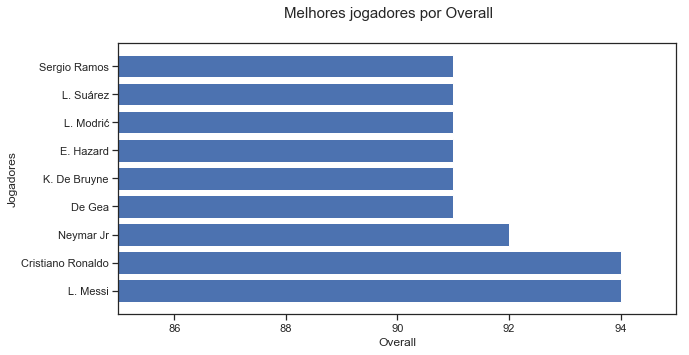

In [11]:
fig = plt.figure(figsize=(10,5))
plt.barh(y=top_players['Name'], width=top_players['Overall'])
plt.xlim(85,95) # Altera os limites do eixo x.
plt.suptitle('Melhores jogadores por Overall', fontsize=15) # Inclui o título no gráfico.
plt.xlabel('Overall', fontsize=12) # Inclui os rótulos do eixo X.
plt.ylabel('Jogadores', fontsize=12) # Inclui os rótulos do eixo Y.
plt.show()

<a name="MELJOGPOS"></a>
<h3>Quais os melhores jogadores por posição?</h3>

Baseando novamente pelo <i>Overall</i> foi feito um <i>Loop For</i> para inclur em uma variável apenas os 3 melhores jogadores de cada posição.

In [12]:
position = players['Position'].unique() # Lista com todas as posiçôes.
players_per_pos = pd.DataFrame() # Criando um DataFrame para incluir os jogadores.
for i in position: 
    # Acrescenta a cada iteração os 5 jogadores com o Overall mais alto de acordo com a posição.
    players_per_pos=players_per_pos.append(players.loc[players['Position']==i].sort_values(['Overall'],
                                                                                           ascending=False).head(3))
players_per_pos.sort_values(['Overall'], ascending=False).head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Weak Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,4.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,4.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0


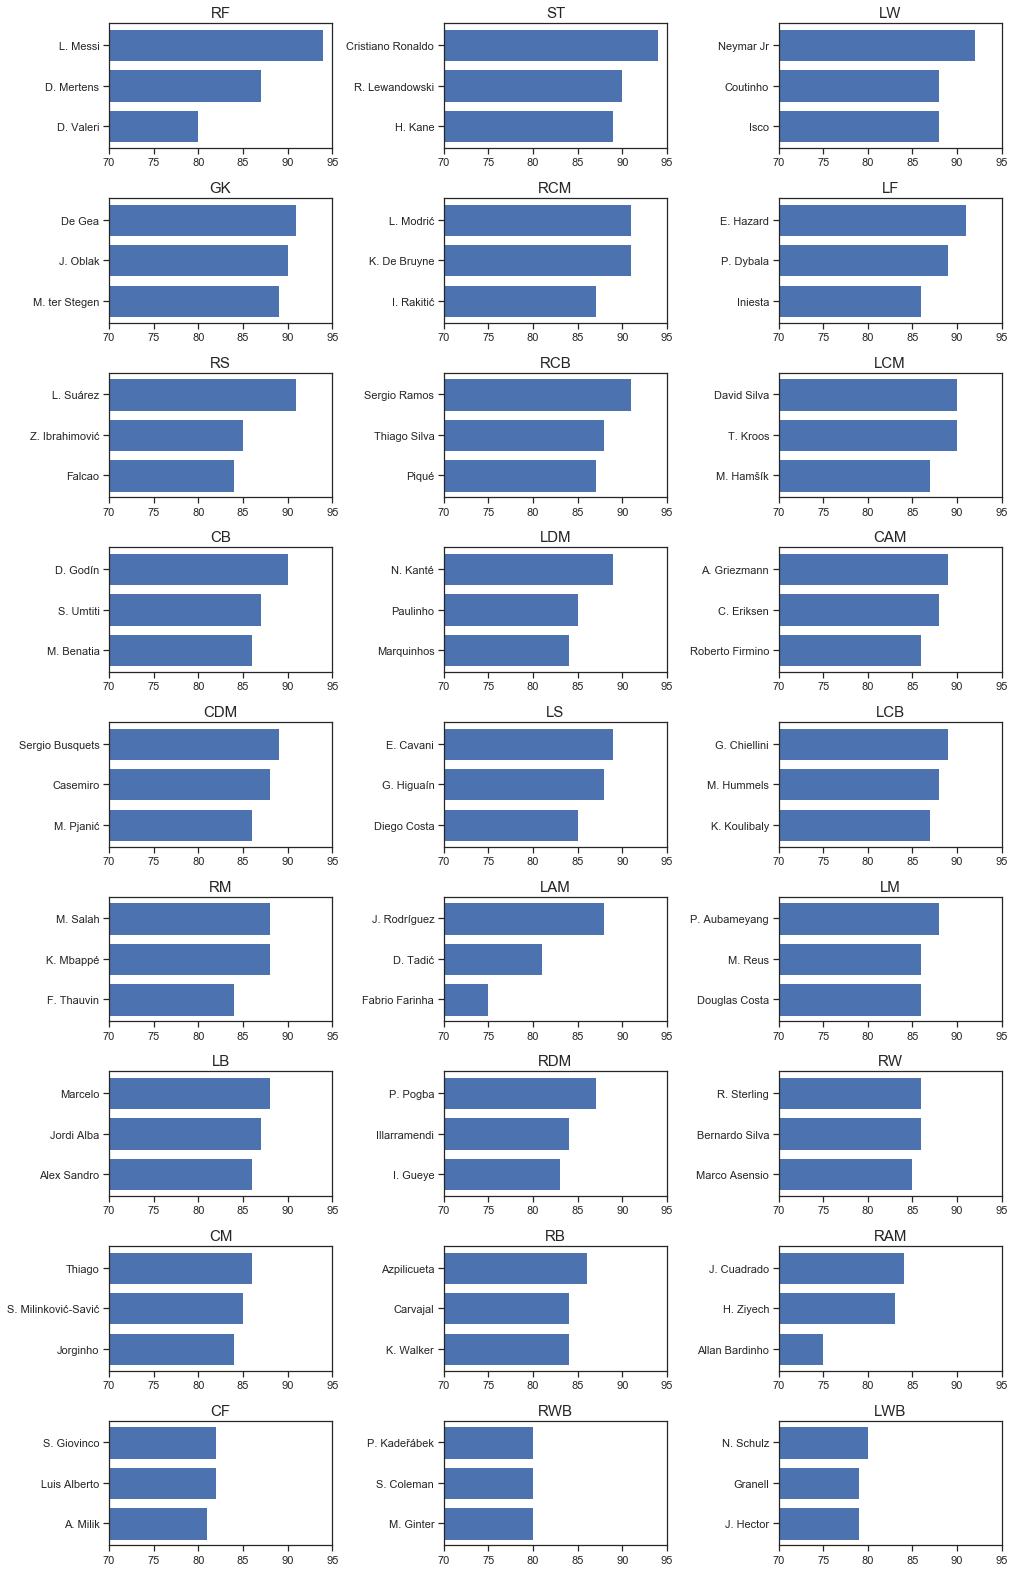

In [13]:
fig, axs = plt.subplots(9,3,figsize=(16,28))
fig.subplots_adjust(wspace=0.5, hspace=0.4) # Ajusta a distância horizontal e vertical entre cada gráfico.
index = 0
for i in range(9):
    for j in range(3):
        pos = players_per_pos.loc[players_per_pos['Position']==position[index]].sort_values(['Overall'], ascending=True)
        # Insere na variável apenas os jogadores da Posição definida.
        axs[i, j].barh(y=pos['Name'], width=pos['Overall'])
        axs[i, j].set_xlim(70,95) # Altera os limites do eixo X.
        axs[i, j].set_title(position[index], fontsize=15) # Adiciona o título de cada gráfico.
        index += 1

<a name="MELATR"></a>
<h3>Quais melhores atributos para cada posição?</h3>

Usando novamente o <i>Overall</i> como parâmetro, vamos verificar o <i>coeficiente de correlação</i> entre o <i>Overall</i> e os demais atributos para cada posição, ou seja, quanto maior o <i>coeficiente de correlação</i> maior a influência o atributo exerce no <i>Overall</i>, assim quanto maior esse atributo maior o parâmetro que adotamos como comparação será.<br>
Desta forma concluimos quais são os 5 atributos mais importantes para cada posição no FIFA.

In [14]:
position = players['Position'].unique() # Lista com todas as posições.
# lista com as colunas a serem removidas.
col_drop_atr = ['Name', 'Age', 'Nationality', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'Weak Foot',
                'Skill Moves', 'Position', 'LS', 'ST', 'RS', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
                'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
corr_atr = pd.DataFrame() # DataFrame a ser incluidos as correlações.
for pos in position:
    correlation = players.loc[players['Position']==pos] # Adiciona os jogadores da posição específica.
    correlation.drop(col_drop_atr, axis=1, inplace=True) # Exclui as colunas desnecessárias.
    correlation = correlation.corr().drop(['Overall'], axis=0) # Exclui a linha com os coeficientes de correlação do Overall.
    corr_atr[pos] = correlation['Overall'] # Adiciona ao DF apenas o coluna Overall da tabela de correlação.
corr_atr.head(3)

,RF,ST,LW,GK,RCM,LF,RS,RCB,LCM,CB,...,LM,LB,RDM,RW,CM,RB,RAM,CF,RWB,LWB
Crossing,0.921477,0.616946,0.752665,0.124469,0.634801,0.83182,0.413639,0.277933,0.646205,0.419764,...,0.761228,0.822388,0.422163,0.789479,0.764891,0.815717,0.683136,0.704099,0.898292,0.852503
Finishing,0.930346,0.904036,0.719685,0.317965,0.577161,0.88863,0.893306,0.312371,0.545992,0.399533,...,0.720653,0.517877,0.408166,0.725545,0.699309,0.467972,0.379836,0.883428,0.465358,0.527000
HeadingAccuracy,0.218312,0.708297,0.368662,0.106258,0.385195,0.29590,0.535852,0.789530,0.293439,0.839069,...,0.403947,0.598695,0.388329,0.313199,0.468018,0.609143,0.173065,0.463041,0.701881,0.573770


A forma de representação em gráficos polares foi baseada no código da <a href='https://www.kaggle.com/dczerniawko/fifa19-analysis'>Daria Czerniawko</a>, onde foi feita uma alteração para que seja exposto os 5 atributos com maior coeficiente de correlação para cada posição.<br>
Outro ponto interessante é que <i>Reação</i> está como um dos 5 atributos mais importantes em quase todas as posições, especificamente 23 das 27 posições, logo é muito importante para os jogadores terem uma boa reação.

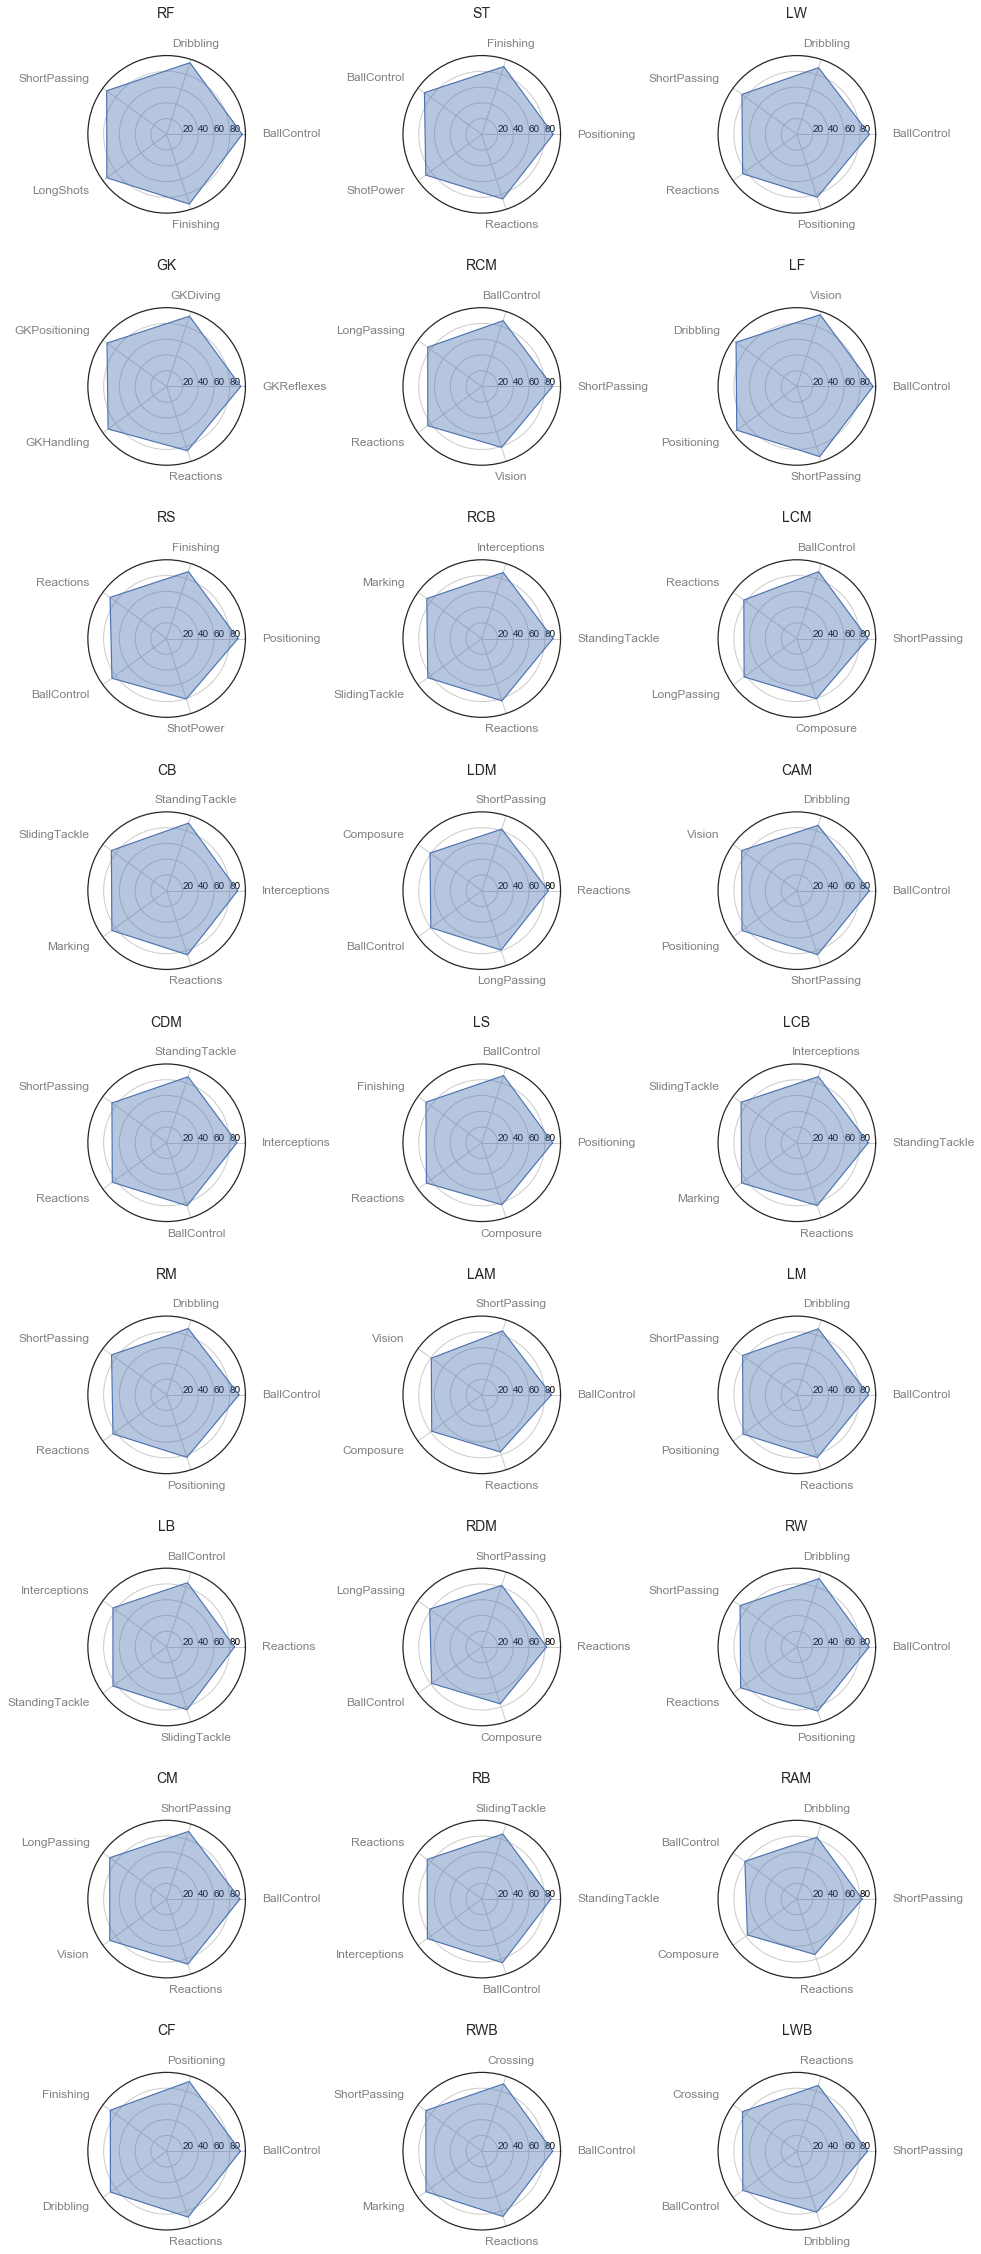

In [15]:
plt.figure(figsize=(16,40))
index = 1
for pos in position:
    pos_label = corr_atr[pos].sort_values(ascending=False).head(5).keys() # Insere os atributos na variável.
    values = list(corr_atr[pos].sort_values(ascending=False).head(5).values) # Insere os coeficientes de correlação.
    values += values[:1] # Acresenta o primeiro coeficiente novamente, para fechar o pentágono.
    ax = plt.subplot(9, 3, index, polar=True)
    angles = [n / 5. * 2 * np.pi for n in range(5)] # Calcula os ângulos de cada eixo.
    angles += angles[:1] # Adiciona o ângulo do primeiro eixo novamente para fechar o círculo.
    plt.xticks(angles[:-1], pos_label, color='grey', size=12) # Inclui 5 posições mais relevantes.
    aligns = ['left', 'center', 'right', 'right', 'center'] # Melhor alinhamento dependendo da posição no gráfico.
    for tick, align in zip(ax.get_xticklabels(), aligns):
        tick.set_ha(align) # Define de acordo com o melhor alinhamento pré-definido.
    ax.set_rlabel_position(0) # Define o ângulo para os rótulos dos raios da circunferência.
    plt.yticks([0.20,0.40,0.60,0.80], ["20","40","60","80"], color="black", size=10) # Insere os rótulos.
    plt.ylim(0,1) # Define o limite do eixo Y.
    ax.plot(angles, values, linewidth=1.2, linestyle='solid') # Insere os pontos no gráfico.
    ax.fill(angles, values, 'b', alpha=0.4) # Preenche o pentagono de azul.
    plt.subplots_adjust(hspace = 0.6, wspace=0.2) # Ajusta a distância horizontal e vertical entre cada gráfico
    plt.title(pos, size=14, y=1.2) # Adiciona o título de cada gráfico.
    index += 1

<a name="TIMES"></a>
<h3>Quais os times com os melhores elencos?</h3>

Para comparar um time com outro vamos utilizar a média do <i>Overall</i>, porém alguns times não possuem 33 jogadores, número máximo de jogadores permitidos, por isso vamos verificar qual é a média de jogadores que os times possuem.

In [16]:
quantidade = players.groupby(['Club']).count().sort_values('Overall', ascending=False)[['Name']]
quantidade.mean()

Name    27.52381
dtype: float64

A média de jogadores que cada time possui é <b>27 jogadores</b>, então vamos deixar apenas os 27 melhores jogadores de cada time, pois a maioria desses jogadores que forem excluídos são muito novos com um <i>Overall</i> muito baixo que não fazem parte do elenco regular do time.

In [17]:
clubs = players['Club'].unique()
elenco = pd.DataFrame()
for club in clubs:
    temp = players.loc[players['Club']==club].sort_values('Overall', ascending=False).head(27)
    elenco = elenco.append(temp)

Com isso chegamos que os 5 melhores elencos são:
<ul>
    <li>Juventus</li>
    <li>Real Madrid</li>
    <li>FC Barcelona</li>
    <li>Manchester City</li>
    <li>Chelsea</li>
</ul>

In [18]:
elenco.groupby(['Club']).mean().sort_values('Overall', ascending=False)['Overall'].head(5)

Club
Juventus           82.280000
Real Madrid        81.481481
FC Barcelona       81.148148
Manchester City    80.629630
Chelsea            80.518519
Name: Overall, dtype: float64

Agora com o <i>boxplot</i> podemos ver a distribuição dos times, e é possível observar que mesmo delimitando a quantidade para 27 jogadores, ainda existem alguns <i>outliers</i>. Porém é possível ver a distribuição dos jogadores de cada time, e para a surpresa o título de melhor elenco fica entre o Juventus e Manchester City, que desbancam grandes nomes e favoritos como Real Madrid e Barcelona.<br>
<b>Obs.:</b> apesar do Manchester ter o valor mínimo e máximo bem mais abaixo, o seu terceiro quartil é superior que o do Juventus e sua mediana também é igual, indicando uma quantidadae maior de jogadores acima da mediana que o time italiano.

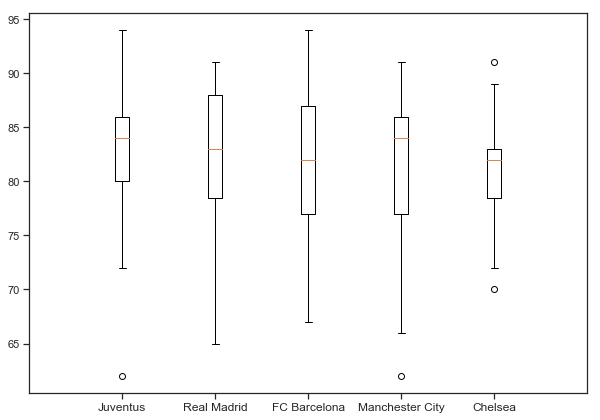

In [19]:
melhores_clubs = ['Juventus', 'Real Madrid', 'FC Barcelona', 'Manchester City', 'Chelsea']
melhores_elencos = pd.DataFrame()
for clubs in melhores_clubs:
    temp = elenco.loc[players['Club']==clubs][['Overall','Club']]
    melhores_elencos = melhores_elencos.append(temp)
plt.figure(figsize=(10,7))
plt.boxplot(melhores_elencos.loc[melhores_elencos['Club']=='Juventus']['Overall'], positions=[1,])
plt.boxplot(melhores_elencos.loc[melhores_elencos['Club']=='Real Madrid']['Overall'], positions=[2,])
plt.boxplot(melhores_elencos.loc[melhores_elencos['Club']=='FC Barcelona']['Overall'], positions=[3,])
plt.boxplot(melhores_elencos.loc[melhores_elencos['Club']=='Manchester City']['Overall'], positions=[4,])
plt.boxplot(melhores_elencos.loc[melhores_elencos['Club']=='Chelsea']['Overall'], positions=[5,])
plt.xticks([1,2,3,4,5], melhores_clubs, fontsize=12)
plt.xlim(0,6)
plt.show()

<h2>Conclusão</h2>

Espero que tenha gostado e aproveitado esse minha análise da base de dados do FIFA 19. Como somos o país do futebol, alguns insights que tentei obter já eram esperados pela convivência que temos com o esporte, entretanto é interessante ver essas assunções validadas e outros fatos curiosos que foram surgindo, como ordem do coeficiente de correlação entre lateral direito e esquerdo serem diferentes.<br>
Obrigado pela leitura dessa minha análise e torço que possa utilizar esse conhecimentos quando for jogar um FIFA.